In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
data = pd.read_csv("kc_house_data.csv")

In [19]:
#Checking for null values
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [20]:
# Data Preprocessing
# Drop irrelevant columns
data.drop(['id', 'date'], axis=1, inplace=True)

In [22]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
# Splitting data into features and target variable
X = data.drop(['price'], axis=1)
y = data['price']

In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# XGBoost Model Training
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Train the model with eval_set
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [26]:
# Prediction
y_pred = model.predict(X_test)

In [27]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22833594312.54519


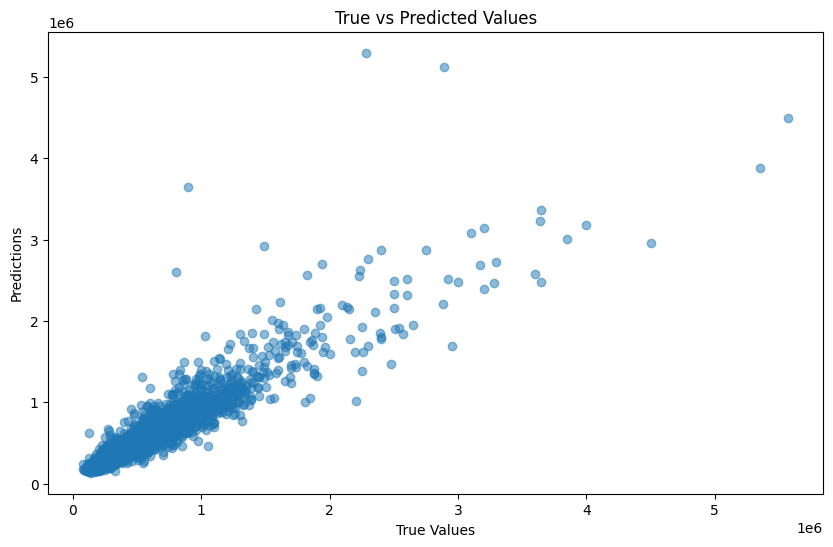

In [28]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Values")
plt.show()

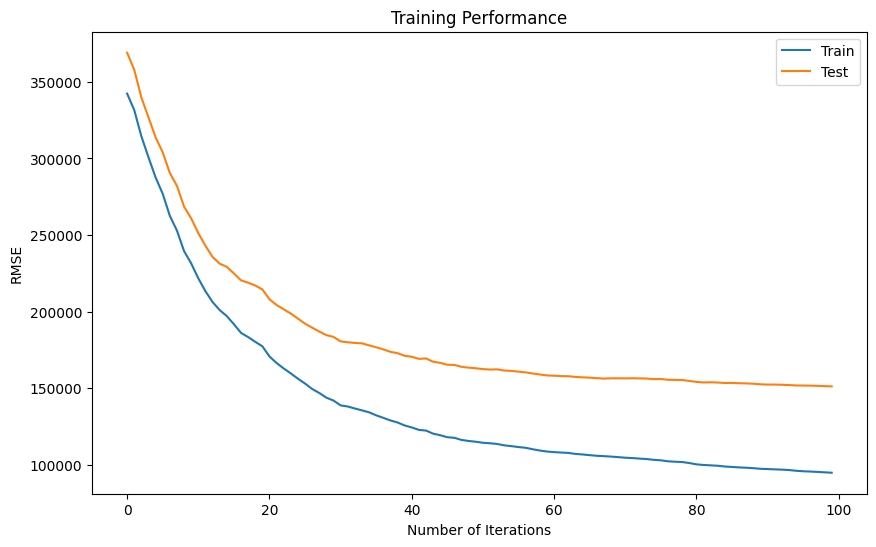

In [29]:
# Training Performance Visualization
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Test')
plt.title("Training Performance")
plt.xlabel('Number of Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [30]:
# Function to predict price based on user input
def predict_price(model, user_input):
    # Convert user input to DataFrame
    user_input_df = pd.DataFrame([user_input], columns=X.columns)
    # Predict price
    predicted_price = model.predict(user_input_df)[0]
    return predicted_price

# User input for features
user_input = {}
for feature in X.columns:
    user_input[feature] = float(input(f"Enter value for {feature}: "))

# Predict price based on user input
predicted_price = predict_price(model, user_input)
print(f"Predicted Price: ${predicted_price:.2f}")

Enter value for bedrooms: 3
Enter value for bathrooms: 1.00
Enter value for sqft_living: 1180
Enter value for sqft_lot: 5650
Enter value for floors: 1.0
Enter value for waterfront: 0
Enter value for view: 0
Enter value for condition: 3
Enter value for grade: 7
Enter value for sqft_above: 1180
Enter value for sqft_basement: 0
Enter value for yr_built: 1955
Enter value for yr_renovated: 0
Enter value for zipcode: 98178
Enter value for lat: 47.5112
Enter value for long: -122.257	
Enter value for sqft_living15: 1340	
Enter value for sqft_lot15: 5650
Predicted Price: $234714.08
